In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model

**EDA**

In [90]:
df=pd.read_csv('/content/hotel_bookings.csv')
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [91]:
df.shape

(119390, 32)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [93]:
#checking for missing vlaues
df.isnull().sum().sort_values(ascending=False).head(40)

,0
company,112593
agent,16340
country,488
children,4
arrival_date_month,0
arrival_date_week_number,0
hotel,0
is_canceled,0
stays_in_weekend_nights,0
arrival_date_day_of_month,0


In [94]:
#Ranges of numerical columns
for column in df.columns:
    if df[column].dtype!=object:
        print(column ,":",df[column].min(), ":",df[column].max())

is_canceled : 0 : 1
lead_time : 0 : 737
arrival_date_year : 2015 : 2017
arrival_date_week_number : 1 : 53
arrival_date_day_of_month : 1 : 31
stays_in_weekend_nights : 0 : 19
stays_in_week_nights : 0 : 50
adults : 0 : 55
children : 0.0 : 10.0
babies : 0 : 10
is_repeated_guest : 0 : 1
previous_cancellations : 0 : 26
previous_bookings_not_canceled : 0 : 72
booking_changes : 0 : 21
agent : 1.0 : 535.0
company : 6.0 : 543.0
days_in_waiting_list : 0 : 391
adr : -6.38 : 5400.0
required_car_parking_spaces : 0 : 8
total_of_special_requests : 0 : 5


is_canceled
0    75166
1    44224
Name: count, dtype: int64


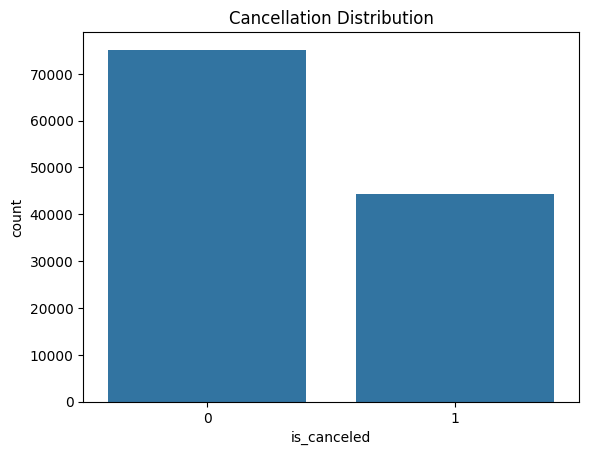

In [95]:
#Distripution of the target

print(df['is_canceled'].value_counts())

sns.countplot(x="is_canceled", data=df)
plt.title("Cancellation Distribution")
plt.show()

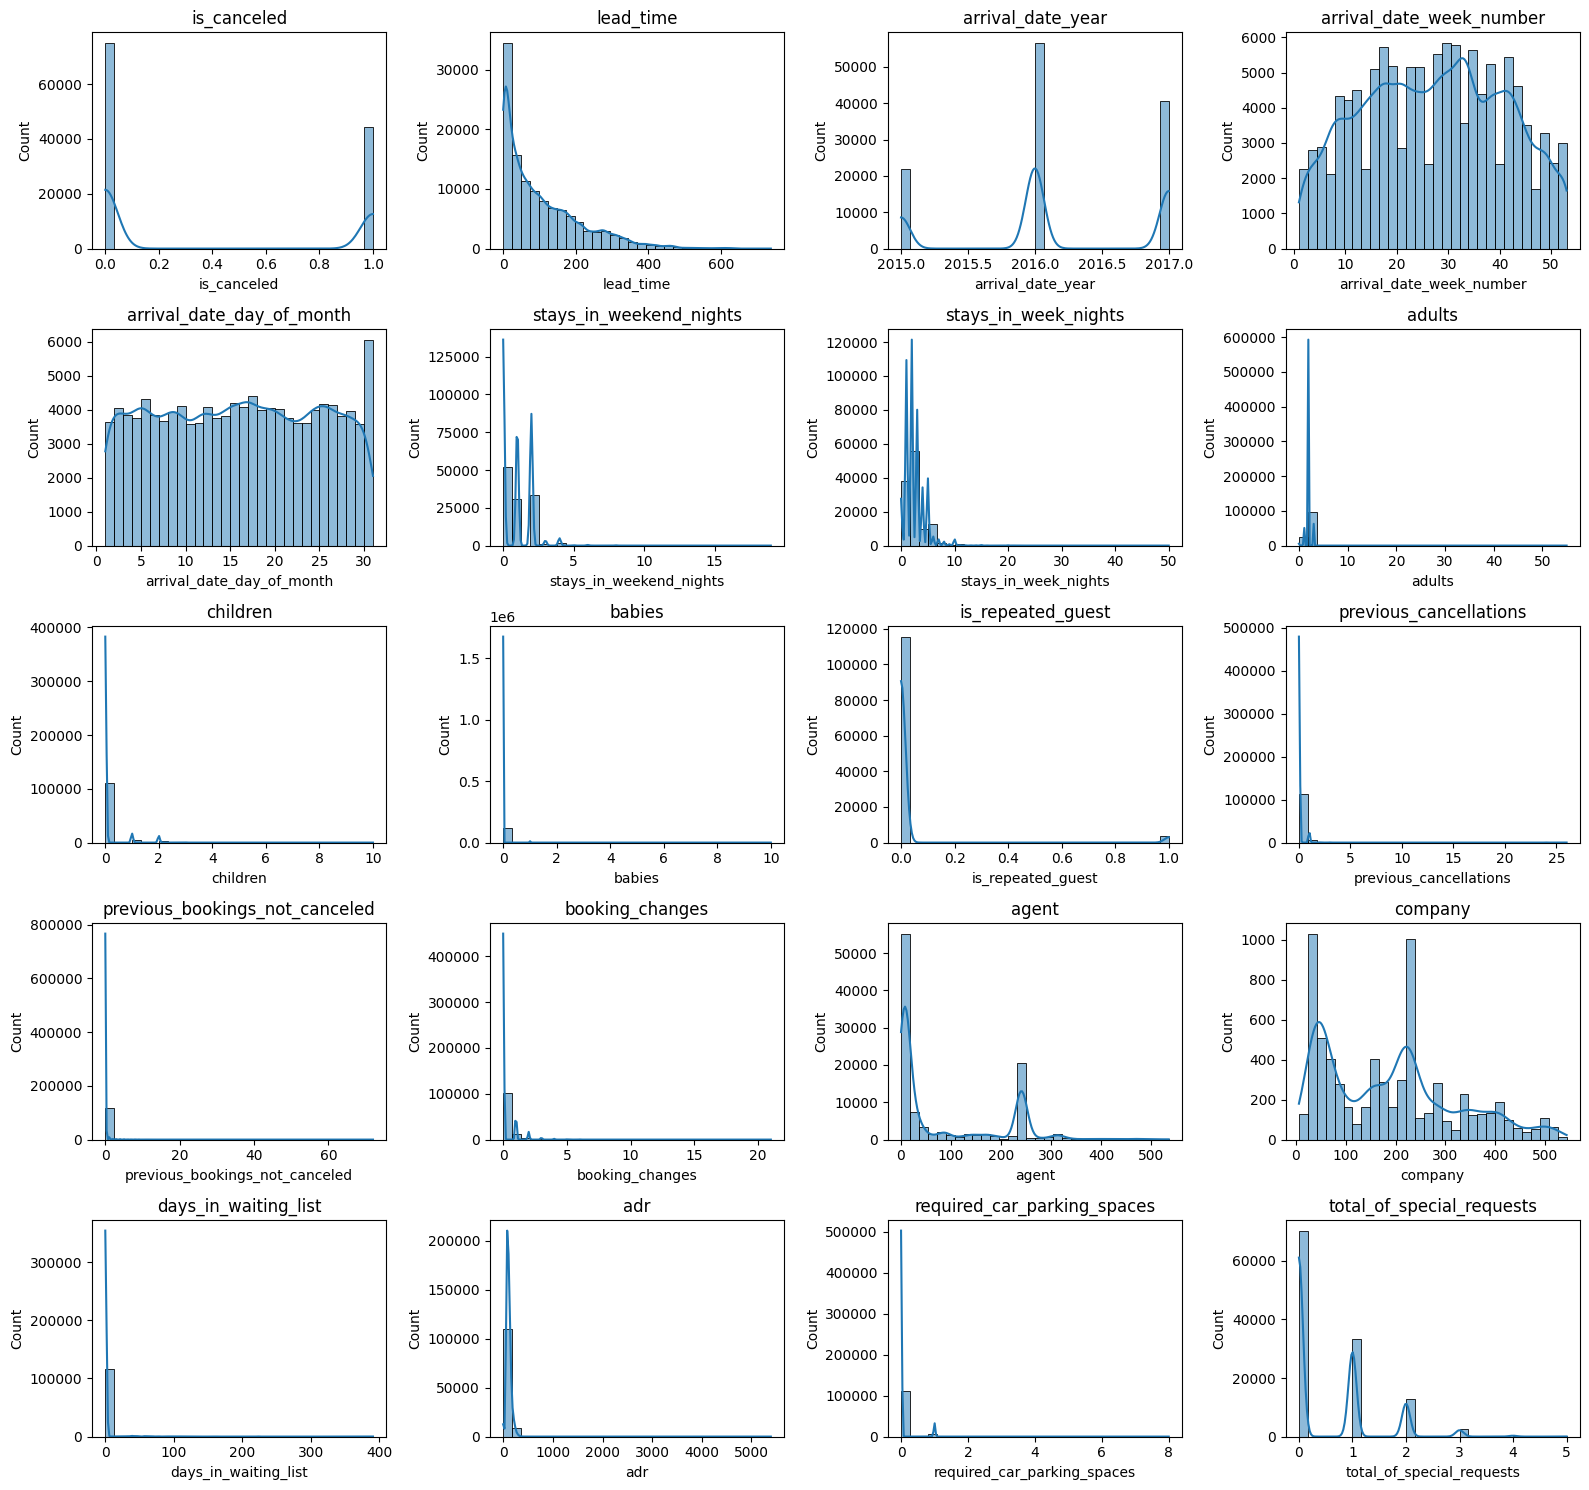

In [96]:
#distribution(freq) of numerical columns (histplot)
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

n_cols = 4
n_rows = (len(num_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 4, n_rows * 3))

for i, column in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()


In [97]:
df.groupby('adults')['is_canceled'].value_counts()

adults  is_canceled
0       0                294
        1                109
1       0              16353
        1               6674
2       0              54422
        1              35258
3       0               4051
        1               2151
4       0                 46
        1                 16
5       1                  2
6       1                  1
10      1                  1
20      1                  2
26      1                  5
27      1                  2
40      1                  1
50      1                  1
55      1                  1
Name: count, dtype: int64

In [98]:
df.groupby('children')['is_canceled'].value_counts()

children  is_canceled
0.0       0              69702
          1              41094
1.0       0               3294
          1               1567
2.0       0               2111
          1               1541
3.0       0                 59
          1                 17
10.0      1                  1
Name: count, dtype: int64

In [99]:
df.groupby('babies')['is_canceled'].value_counts()

babies  is_canceled
0       0              74416
        1              44057
1       0                735
        1                165
2       0                 13
        1                  2
9       0                  1
10      0                  1
Name: count, dtype: int64

In [100]:
#outlier check
num_df = df.select_dtypes(include=['int64', 'float64'])

Q1 = num_df.quantile(0.25)
Q3 = num_df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((num_df < (Q1 - 1.5 * IQR)) | (num_df > (Q3 + 1.5 * IQR)))
outliers_ratio = outliers.sum() / len(num_df)
print(outliers_ratio.sort_values(ascending=False))

adults                            0.248848
booking_changes                   0.151403
children                          0.071949
required_car_parking_spaces       0.062116
previous_cancellations            0.054309
is_repeated_guest                 0.031912
adr                               0.031770
days_in_waiting_list              0.030974
previous_bookings_not_canceled    0.030321
stays_in_week_nights              0.028093
lead_time                         0.025170
total_of_special_requests         0.024097
babies                            0.007681
stays_in_weekend_nights           0.002220
is_canceled                       0.000000
arrival_date_year                 0.000000
arrival_date_week_number          0.000000
arrival_date_day_of_month         0.000000
company                           0.000000
agent                             0.000000
dtype: float64


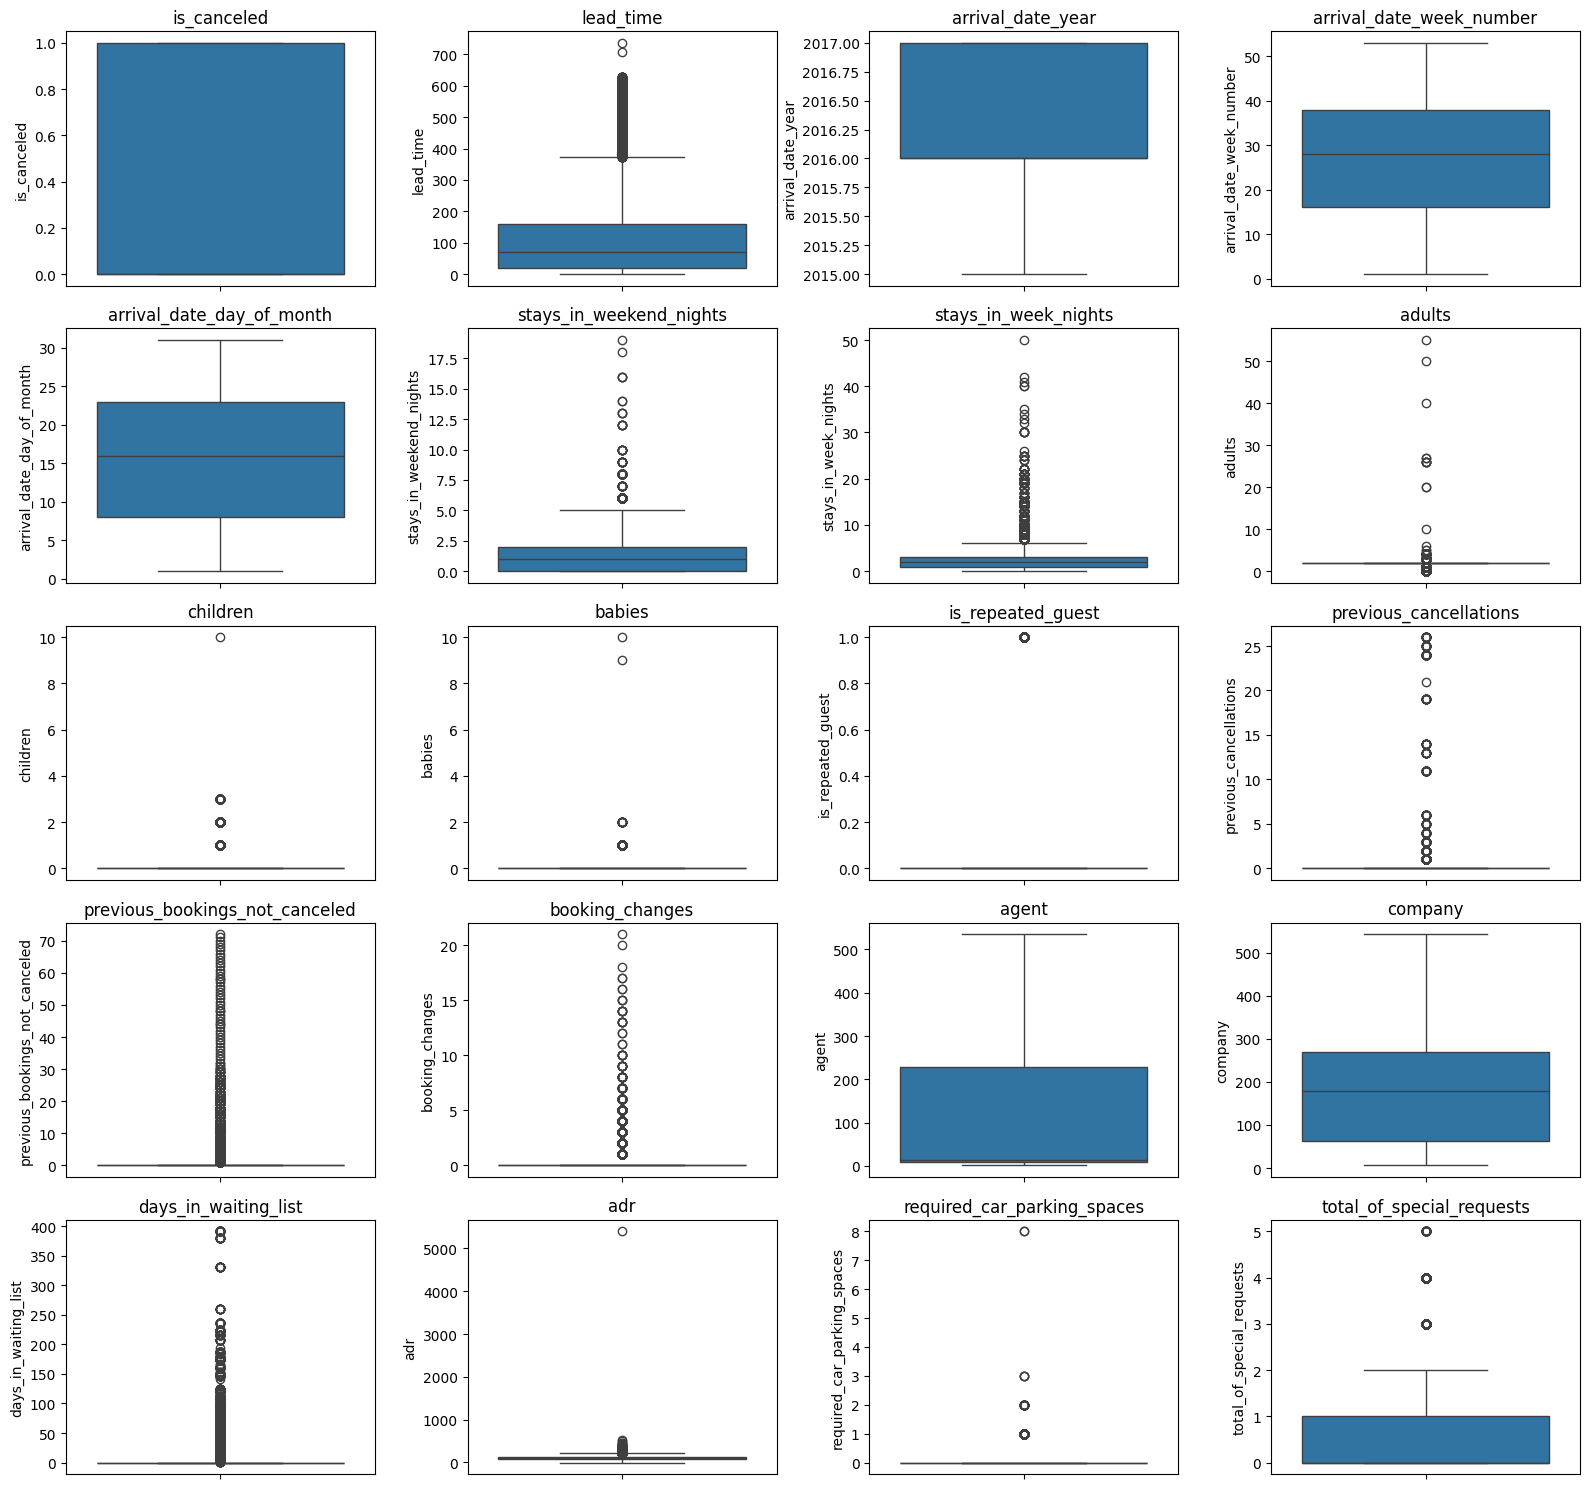

In [101]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

n_cols = 4
n_rows = (len(num_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 4, n_rows * 3))

for i, column in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()


**EDA**

In [102]:
#remove unnecessary columns
df.drop(["hotel","company", "agent", "reservation_status", "reservation_status_date"], axis=1, inplace=True)

In [103]:
#drop nulls - missing values are not that large compared to the data size
df.dropna(inplace=True)

In [104]:
#drop duplicates
df.drop_duplicates()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,2015,July,27,1,0,0,2,0.0,...,0,C,C,3,No Deposit,0,Transient,0.00,0,0
1,0,737,2015,July,27,1,0,0,2,0.0,...,0,C,C,4,No Deposit,0,Transient,0.00,0,0
2,0,7,2015,July,27,1,0,1,1,0.0,...,0,A,C,0,No Deposit,0,Transient,75.00,0,0
3,0,13,2015,July,27,1,0,1,1,0.0,...,0,A,A,0,No Deposit,0,Transient,75.00,0,0
4,0,14,2015,July,27,1,0,2,2,0.0,...,0,A,A,0,No Deposit,0,Transient,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,August,35,30,2,5,2,0.0,...,0,A,A,0,No Deposit,0,Transient,96.14,0,0
119386,0,102,2017,August,35,31,2,5,3,0.0,...,0,E,E,0,No Deposit,0,Transient,225.43,0,2
119387,0,34,2017,August,35,31,2,5,2,0.0,...,0,D,D,0,No Deposit,0,Transient,157.71,0,4
119388,0,109,2017,August,35,31,2,5,2,0.0,...,0,A,A,0,No Deposit,0,Transient,104.40,0,0


In [105]:
#handle outliears

# Drop rows where adults = 0 (invalid booking)
df = df[df['adults'] > 0]

# Cap values
df['booking_changes'] = df['booking_changes'].clip(upper=10)
df['required_car_parking_spaces'] = df['required_car_parking_spaces'].clip(upper=2)
df['children'] = df['children'].clip(upper=3)
df['babies'] = df['babies'].clip(upper=3)
df['adr'] = df['adr'].clip(upper=1000)
df['lead_time'] = df['lead_time'].clip(upper=365)
df['previous_bookings_not_canceled'] = df['previous_bookings_not_canceled'].clip(upper=10)
df['previous_cancellations'] = df['previous_cancellations'].clip(upper=10)
df['total_of_special_requests'] = df['total_of_special_requests'].clip(upper=5)
df['days_in_waiting_list'] = df['days_in_waiting_list'].clip(upper=365)
df['stays_in_week_nights'] = df['stays_in_week_nights'].clip(upper=30)
df['stays_in_weekend_nights'] = df['stays_in_weekend_nights'].clip(upper=30)

# Fix is_repeated_guest (force binary)
df['is_repeated_guest'] = df['is_repeated_guest'].apply(lambda x: 1 if x >= 1 else 0)


# Feature extraction

In [106]:
#Creat New features

df['total_guests'] = df['adults'] + df['children'] + df['babies']
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['is_family'] = ((df['children'] > 0) | (df['babies'] > 0)).astype(int)

In [107]:
#scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

scaler_std = StandardScaler()
df[num_cols] = scaler_std.fit_transform(df[num_cols])

In [108]:
#label encoding
from sklearn.preprocessing import LabelEncoder

cat_cols = df.select_dtypes(include=["object"]).columns

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

In [109]:
#final dataframe

df.head(30)

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_guests,total_nights,is_family
0,-0.769232,2.381106,-1.635536,5,-0.012211,-1.685442,-0.934871,-1.326081,0.23782,-0.258242,...,4.448118,0,-0.133526,2,-2.124820,-0.255624,-0.720615,0.037531,-1.357980,-0.288319
1,-0.769232,2.609638,-1.635536,5,-0.012211,-1.685442,-0.934871,-1.326081,0.23782,-0.258242,...,6.046946,0,-0.133526,2,-2.124820,-0.255624,-0.720615,0.037531,-1.357980,-0.288319
2,-0.769232,-0.947503,-1.635536,5,-0.012211,-1.685442,-0.934871,-0.795761,-1.51801,-0.258242,...,-0.348368,0,-0.133526,2,-0.564529,-0.255624,-0.720615,-1.355844,-0.961921,-0.288319
3,-0.769232,-0.887886,-1.635536,5,-0.012211,-1.685442,-0.934871,-0.795761,-1.51801,-0.258242,...,-0.348368,0,-0.133526,2,-0.564529,-0.255624,-0.720615,-1.355844,-0.961921,-0.288319
4,-0.769232,-0.877950,-1.635536,5,-0.012211,-1.685442,-0.934871,-0.265440,0.23782,-0.258242,...,-0.348368,0,-0.133526,2,-0.086040,-0.255624,0.541601,0.037531,-0.565862,-0.288319
5,-0.769232,-0.877950,-1.635536,5,-0.012211,-1.685442,-0.934871,-0.265440,0.23782,-0.258242,...,-0.348368,0,-0.133526,2,-0.086040,-0.255624,0.541601,0.037531,-0.565862,-0.288319
6,-0.769232,-1.017056,-1.635536,5,-0.012211,-1.685442,-0.934871,-0.265440,0.23782,-0.258242,...,-0.348368,0,-0.133526,2,0.101195,-0.255624,-0.720615,0.037531,-0.565862,-0.288319
7,-0.769232,-0.927631,-1.635536,5,-0.012211,-1.685442,-0.934871,-0.265440,0.23782,-0.258242,...,-0.348368,0,-0.133526,2,0.017979,-0.255624,0.541601,0.037531,-0.565862,-0.288319
8,1.299998,-0.172483,-1.635536,5,-0.012211,-1.685442,-0.934871,0.264881,0.23782,-0.258242,...,-0.348368,0,-0.133526,2,-0.418902,-0.255624,0.541601,0.037531,-0.169803,-0.288319
9,1.299998,-0.271845,-1.635536,5,-0.012211,-1.685442,-0.934871,0.264881,0.23782,-0.258242,...,-0.348368,0,-0.133526,2,0.069989,-0.255624,-0.720615,0.037531,-0.169803,-0.288319


**data splet**

In [110]:
from sklearn.model_selection import train_test_split

X = df.drop("is_canceled", axis=1)
y = df["is_canceled"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Shape of Train:", X_train.shape, y_train.shape)
print("Shape of Test :", X_test.shape, y_test.shape)

Shape of Train: (94804, 29) (94804,)
Shape of Test : (23701, 29) (23701,)
